# HW 3 Optimization (80pts)

**Due 11:59pm, Apr 29th.**

## Please restart the kernel and run all before you submit !


## Your Name: Fionnuala Eastwood

In [1]:
# import packages
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from functools import partial

# Exercise 1: SGD with arbitrary batch size  (50pts)

**The goal of this exercise is to implement SGD with arbitrary batch size for a certain linear regression model.** 

Given data points $(x^i,y^i)_{i=1}^m$ where each data point $x$ has three features/attributes, i.e. $x=(x_1,x_2,x_3)$, we consider the following linear regression model
$$ y =  a_0 + a_1x_1 + a_2x_2 + a_3x_3.$$

Here, $a_0,a_1,a_2,a_3$ are coefficients. 

The corresponding optimization problem is 

$$ \mathop{\mathrm{Loss}}(a_0,a_1,a_2,a_3) = \frac{1}{m}\sum_{i=1}^{m} (a_0+a_1x_1^i+a_2x_2^i+a_3x_3^i-y^i)^2 $$


You should do the following three things:

1. Write a python function to implement SGD with arbitrary batch_size. Hint: you can write it as a python function and treat batch size as a function input.

2. Select at least 4 batch sizes and fix the number of iteration, then run SGD for different batch sizes, report the the running time for each batch size (use `print`). What is your conclusion?

3. For each batch size you used in part 2, draw a plot to visualize the loss (y-axis) vs iterations (x-axis). What is your conclusion?

Requirements:

1. Your SGD algorithm should allow different batch sizes. 

2. Write python functions or for loop to do 2 and 3.

3. Detailed docustring is required for each function. Add necessary inline comments and markdown to explain your code and make comments.

Grading is based on the codes (15 pts), function docstrings (10 pts), comments (10 pts) and conclusions (15 pts).

In [2]:
# run this cell to generate data points
m = 10000                                # number of data points
n = 3                                    # number of features
x = np.random.randn(m,n)                 # each row of x represents a data point
theta = np.random.randn(n,1)             # true coefficients a_1, a_2, a_3
y = x@theta + 3 + np.random.rand(m,1)    # observations and true a_0 = 3

In [3]:
def SGD(batch_size, iterations):
    """
    This function generates a SGD for the given data.
    INPUT:
    batch_size: size of sample that is being used to generate the SGD
    OUTPUT: a0, a1, a2, a3, losses, run_time
    This function outputs the coefficients generated and the total time it took to run the function, along with a graph of the loss over iterations.
    """
    start = time.time() # begin the time
    batch_size = batch_size # setting batch_size to user input
    eps = 0.01 # "learning rate", controls how much we are allowed to - change the estimates in each iteration
    iterations = iterations # setting iterations
    losses = [] # creating an empty array for losses that will be added to in line 43

    # Initialize coefficients randomly
    a0 = np.random.randn(batch_size, 1) 
    a1 = np.random.randn(batch_size, 1)
    a2 = np.random.randn(batch_size, 1)
    a3 = np.random.randn(batch_size, 1)

    # create for loop to iterate through the data
    for t in range(iterations):
        
        # random select one point (j) to update the coefficients for each iteration - random indices for mini-batch
        j = np.random.choice(m, size = batch_size, replace = False)

        # index x and y by that value to get the points for this iteration
        x_batch = x[j]
        y_batch = y[j]

        # indexing each of the individual x values based on their # - will be used in next step
        x1_batch = x_batch[:,:1]
        x2_batch = x_batch[:,1:2]
        x3_batch = x_batch[:,2:]
        
        # approximate gradient using randomly selected point and the x_batches just created
        g_a0 = 2*sum(a0 + (a1*x1_batch) + (a2*x2_batch) + (a3*x3_batch) - y_batch)/batch_size  # gradient for a0
        g_a1 = 2*sum((x1_batch)*(a0 + (a1*x1_batch) + (a2*x2_batch) + (a3*x3_batch) - y_batch))/batch_size  # gradient for a1
        g_a2 = 2*sum((x2_batch)*(a0 + (a1*x1_batch) + (a2*x2_batch) + (a3*x3_batch) - y_batch))/batch_size  # gradient for a2
        g_a3 = 2*sum((x3_batch)*(a0 + (a1*x1_batch) + (a2*x2_batch) + (a3*x3_batch) - y_batch))/batch_size # gradient for a3
        
        # update coeficients using GD and learning rate
        a0 = a0 - eps * g_a0
        a1 = a1 - eps * g_a1
        a2 = a2 - eps * g_a2
        a3 = a3 - eps * g_a3
        
        # compute current loss
        L = np.sum((a0 + (a1*x1_batch) + (a2*x2_batch) + (a3*x3_batch) - y_batch)**2) / m
        losses.append(L) # append the loss to the loss array

    # end and calculate total time
    end = time.time() 
    run_time = end - start
    return losses, run_time

Iterations: 500
Batch Size: 100
run time = 0.3189358711242676

Batch Size: 500
run time = 0.6486401557922363

Batch Size: 1000
run time = 1.2013649940490723

Batch Size: 2000
run time = 2.1585590839385986



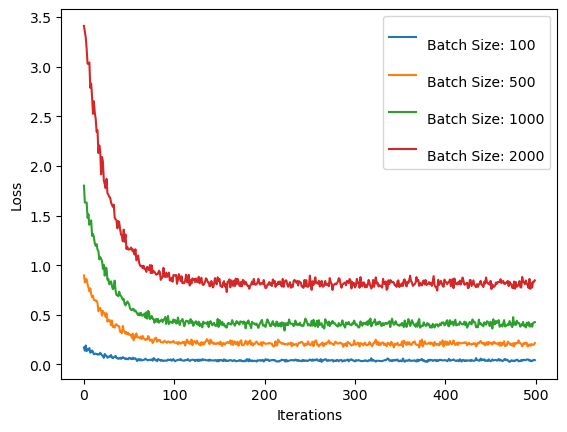

In [4]:
# vector of test batch sizes to run through
batch_size = [100, 500, 1000, 2000]

# number of iterations to use for the SGD
iterations = 500
print(f"Iterations: {iterations}")

# run a for loop to cycle through the batch sizes, call the SGD for each, print the run time and plot each loss on a graph.
for each in batch_size:
    #call the SGD
    L, run_time = SGD(each, iterations)
    
    # Outputting batch_size and run time
    print(f"Batch Size: {each}")
    print(f"run time = {run_time}\n")

    # plotting the loss
    plt.plot(range(iterations), L, label = f"\nBatch Size: {each}")
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()


## Conclusion
The generated run time for each batch size shows that it takes much more time to process the larger batch sizes. In addition, the graph visualizes that the larger the batch size gets, the larger the loss is, while the smaller the batch size, the more accurate the regression (lower loss).

# Exercise 2: SGD animation for polynomial regression (30 pts)

In this exercise, our goal is to create a similar animation (which is available [here](https://nbviewer.org/github/PhilChodrow/PIC16B/blob/master/lectures/math/optimization.ipynb)) for polynomial regression model.  


#### Comments:
You cannot copy the code in the link directly because 

1. the sample code is for simple linear regression only, but we are considering polynomial regression.

2. the data generating process is included in the class initialization, however training data are provided in this exercise.

Please understand the sample code first, and then modify it accordingly. It is also fine if you do not write a class (class is used in the sample code) to do the animation.

200 interations are used in the sample code. Since our model is complicated here, you can use more iterations if you like.

#### Grading policy:
1. There is no error in your code.
2. The animation result looks reasonable.
3. Docstring and comments are required for your code.


#### Mathematics on polynomial regression:
Given data points $(x_i,y_i)_{i=1}^m$, polynomial regression is considered if we believe that the true relation between input $x$ and output $y$ can be described by a polynomial $y=a_0+a_1x+\cdots+a_nx^n$ for some degree $n$.

The goal is to find coefficients $a_0,\cdots,a_n$ by minimizing the loss function
$$ \mathop{\mathrm{minimize}}_{a_o,\cdots,a_n} \frac{1}{m}\sum_{i=1}^m (a_0+a_1x_i+\cdots+a_nx_i^n-y_i)^2 $$

Then we can use SGD to solve this optimization problem.

#### Data Generation

Please run the following code to generate the data points.

In [ ]:
class UpdatePlot:
    def __init__(self, ax, X, y, true_coeffs, eps1, m, degree):
        """
        Initialize all of the variable being used in the class and functions
        ax  - initialized axes created below
        X  - vector of m X values
        y  - function for y
        true_coeffs - origional coefficients used in the y funciton
        eps1  - learning rate
        m - amount of points generated
        degree - how many degrees the y funcition goes up to ( as the y  function is y = -2 - 2*X + X**2 the degree is 2)
        """
        # setting up the two graphs - regression line and loss
        self.ax0 = ax[0]
        self.ax1 = ax[1]

        #initializing the true coeff
        self.true_coeffs = true_coeffs

        # Generate random initial coefficients
        self.init_coeffs = np.zeros(degree + 1)

        # setting all the given data
        self.eps1 = eps1
        self.m = m
        self.degree = degree
        
        # Generate data
        self.X = X
        self.y = y
        
        # Used for plotting lines
        self.x_space = np.linspace(0, 3, self.m)
        
        # Show data on lefthand plot
        self.ax0.scatter(self.X, self.y, color="grey", s=4, zorder=100)
        
        # Prepare animation variables
        self.point = self.ax0.scatter([], [], color="red", zorder=200)
        self.line, = self.ax0.plot([], [], 'k-')
        self.loss, = self.ax1.plot([], [], 'k-')
        
        # Timesteps and value of loss function
        self.t = []
        self.L = []


    def polynomial_features(self, x1, degree):
        """
        Generate polynomial features for input data X(either one point or a vector of points) up to the specified degree.
        """
        # if the x1 is a float or int, make it into a vector, otherwise leave it as it is
        if isinstance(x1, float) or isinstance(x1, int):
            x1 = np.array([x1])
        X_poly = np.ones((len(x1), degree + 1)) # initialize X_poly to hold the x values
        # use for loop to iterate through range starting at one so that the first x value is 1 (will multiply with y-intercept)
        for d in range(1, degree + 1):
            X_poly[:, d] = x1 ** d
        return X_poly

    def compute_loss(self):
        """
        Compute the loss for polynomial regression.
        """
        x_degree = self.polynomial_features(self.X, self.degree) # pass the X vector of points to call polynomial_features to set the X values based on degree
        error = np.dot(x_degree, self.init_coeffs) - self.y # multiply each row by the coefficients and sum each row, then subtract by y
        loss = np.mean(error ** 2) # Compute mean squared error
        return loss
    
    def __call__(self, i):
        """
        Enables user to call the class, and creates plot updates. With every call there is a single SGD ran, and it returns artist (updates the point, line, and loss)
        i represents the algorithm timestep/animation frame.
        """
        # index X and y with a random point
        j = np.random.randint(self.m)
        x, y = self.X[j], self.y[j] # should index each to one value of the same index

        # calculate gradient for the specific points
        xx_degree = self.polynomial_features(x, self.degree)
        error = np.dot(xx_degree, self.init_coeffs) - y
        gradient = 2 * np.dot(xx_degree.T, error)

        # update the initial coefficients with gradient evaluated at that point
        self.init_coeffs -= self.eps1 * gradient

        # Evaluate loss function
        L = self.compute_loss()
        
        # Update lefthand plot with highlight point and new regression line
        self.point.set_offsets([[x, y]]) # updating highlighted point
        y_pred = sum(self.init_coeffs[d] * self.x_space ** d for d in range(len(self.init_coeffs)))
        self.line.set_data(self.x_space, y_pred) # updating the regression line
        
        # Update timestep and loss function
        self.t.append(i) # where is this i coming from??
        self.L.append(L)
        
        # Plot loss function
        self.loss.set_data(self.t, self.L)
        
        # Return artists
        return [self.point, self.line, self.loss]

# Given Data to generate data
m = 100 # amount of points to generate

# generate input x 
X = np.random.uniform(0,3,m)
X.sort()

# generate output y
y = -2 - 2*X + X**2 + 0.1*np.random.randn(m)

# Number of algorithm iterations
n_steps = 200

# Create plotting background
fig, ax = plt.subplots(1, 2, figsize=(7, 3)) # creating the two seperate graphs

# set limits for the x and y axes for both graphs
ax[0].set_xlim(0, 3)
ax[0].set_ylim(-5, 3)
ax[1].set_xlim(0, n_steps)
ax[1].set_ylim(0, 5)
ax[1].grid(True) # setting a grid for the second graph (Loss graph)

# setting titles and x/y axis labels
ax[0].set(title="Regression Problem", xlabel=r"$x$", ylabel=r"$y$")
ax[1].set(title="Current Loss", xlabel="Iteration", ylabel=r"$\mathcal{L}$")
plt.tight_layout()

# True coefficients of the polynomial function (found from the y formula)
true_coeffs = [-2, -2, 1]

# learning rate
eps1=0.01

# how many degrees the y funcition goes up to
degree=2

# Create the plot updater, and calling the class
ud = UpdatePlot(ax, X, y, true_coeffs, eps1, m, degree)
anim = FuncAnimation(fig, ud, frames=n_steps, interval=100, blit=True)

# To interactively display in notebook
plt.close()  # Prevents plot from showing twice
HTML(anim.to_jshtml())
